In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']

In [5]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))
df.head()

C:\Users\vamsi\AppData\Local\Temp\ipykernel_3812\3036109603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))


,target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [7]:
max(df['message_len'])

171

In [8]:
balance_counts = df.groupby('target')['target'].agg('count').values
balance_counts

array([4825,  747], dtype=int64)

In [9]:
import re
import string

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
df['message_clean'] = df['message'].apply(clean_text)
df.head()

C:\Users\vamsi\AppData\Local\Temp\ipykernel_3812\1949343398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_clean'] = df['message'].apply(clean_text)


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


In [12]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps= PorterStemmer()

In [13]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

C:\Users\vamsi\AppData\Local\Temp\ipykernel_3812\2801583507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_clean'] = df['message_clean'].apply(remove_stopwords)


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goes usf lives around though


In [14]:
import nltk

In [15]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [16]:
df['message_clean'] = df['message_clean'].apply(stemm_text)
df.head()

C:\Users\vamsi\AppData\Local\Temp\ipykernel_3812\258689352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_clean'] = df['message_clean'].apply(stemm_text)


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though


In [17]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text

In [18]:
df['message_clean'] = df['message_clean'].apply(preprocess_data)
df.head()

C:\Users\vamsi\AppData\Local\Temp\ipykernel_3812\4106816117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_clean'] = df['message_clean'].apply(preprocess_data)


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say ear hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()

,target,message,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say ear hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though,0


In [20]:
x = df['message_clean']
y = df['target_encoded']

print(len(x), len(y))

5572 5572


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [23]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [24]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [27]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
def train_classifier(clf,x_train_dtm,y_train,x_test_dtm,y_test):
    clf.fit(x_train_dtm,y_train)
    y_pred = clf.predict(x_test_dtm)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [30]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train_dtm,y_train,x_test_dtm,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.905240488155061
Precision -  0.6705202312138728


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9210337401292176
Precision -  0.9879518072289156
For  NB
Accuracy -  0.9784637473079684
Precision -  0.9398907103825137
For  DT
Accuracy -  0.9246231155778895
Precision -  1.0
For  LR
Accuracy -  0.9763101220387652
Precision -  0.9817073170731707
For  RF
Accuracy -  0.9727207465900933
Precision -  0.9935483870967742


In [31]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [32]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.924623,1.000000
5,RF,0.972721,0.993548
1,KN,0.921034,0.987952
4,LR,0.976310,0.981707
2,NB,0.978464,0.939891
0,SVC,0.905240,0.670520


In [33]:
texts = df['message_clean']
target = df['target_encoded']

In [34]:
texts

0       go jurong point crazi avail bugi n great world...
1                                     ok lar joke wif oni
2       free entri  wkli comp win fa cup final tkts  m...
3                             dun say ear hor alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567     time tri  contact å£ pound prize  claim easi ...
5568                              ì b go esplanad fr home
5569                             piti  mood soani suggest
5570    guy bitch act like id interest buy someth el n...
5571                                       rofl true name
Name: message_clean, Length: 5572, dtype: object

In [35]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from tensorflow.keras.preprocessing.text        import Tokenizer

In [37]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6726

In [38]:
import tensorflow as tf
from keras.utils import pad_sequences

In [39]:
sequences = [[1], [2, 3], [4, 5, 6]]

In [40]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]])

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[   2, 3179,  274, ...,    0,    0,    0],
       [   8,  236,  527, ...,    0,    0,    0],
       [   9,  356,  588, ...,    0,    0,    0],
       ...,
       [6724, 1002, 6725, ...,    0,    0,    0],
       [ 138, 1251, 1603, ...,    0,    0,    0],
       [1986,  378,  170, ...,    0,    0,    0]])

In [43]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('glove.6B/glove.6B.100d.txt', encoding='utf-8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary
# Now we will load embedding

In [44]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57832998, -0.0036551 ,  0.34658   , ...,  0.070204  ,
         0.44509   ,  0.24147999],
       [-0.078894  ,  0.46160001,  0.57779002, ...,  0.26352   ,
         0.59397   ,  0.26741001],
       ...,
       [ 0.63009   , -0.036992  ,  0.24052   , ...,  0.10029   ,
         0.056822  ,  0.25018999],
       [-0.12002   , -1.23870003, -0.23303001, ...,  0.13658001,
        -0.61848003,  0.049843  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
train_padded_sentences

array([[   2, 3179,  274, ...,    0,    0,    0],
       [   8,  236,  527, ...,    0,    0,    0],
       [   9,  356,  588, ...,    0,    0,    0],
       ...,
       [6724, 1002, 6725, ...,    0,    0,    0],
       [ 138, 1251, 1603, ...,    0,    0,    0],
       [1986,  378,  170, ...,    0,    0,    0]])

In [46]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [47]:
X_train

array([[ 365,  112,    0, ...,    0,    0,    0],
       [   2, 1435,  287, ...,    0,    0,    0],
       [ 131,   39,   72, ...,    0,    0,    0],
       ...,
       [  66,    8,   60, ...,    0,    0,    0],
       [   8,  236,  401, ...,    0,    0,    0],
       [  44,   71,   45, ...,    0,    0,    0]])

In [57]:
 y_test

3897    0
2467    0
3512    0
3340    0
3863    0
       ..
1903    1
5371    0
269     1
2758    0
3974    0
Name: target_encoded, Length: 1393, dtype: int32

In [48]:
from keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Embedding,LSTM, GlobalMaxPool1D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [49]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM( 
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
     
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           672600    
                                                                 
 bidirectional (Bidirectiona  (None, 80, 160)          115840    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 160)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [50]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [51]:
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)


Epoch 1/7
131/131 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8583
Epoch 1: val_loss improved from inf to 0.31104, saving model to model.h5
131/131 [==============================] - 36s 201ms/step - loss: 0.3555 - accuracy: 0.8583 - val_loss: 0.3110 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 2/7
131/131 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9387
Epoch 2: val_loss improved from 0.31104 to 0.18125, saving model to model.h5
131/131 [==============================] - 24s 180ms/step - loss: 0.1834 - accuracy: 0.9387 - val_loss: 0.1813 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 3/7
131/131 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.9622
Epoch 3: val_loss improved from 0.18125 to 0.10348, saving model to model.h5
131/131 [==============================] - 23s 179ms/step - loss: 0.1359 - accuracy: 0.9622 - val_loss: 0.1035 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 4/7
131/131 [============================

In [60]:
y_pred = model.predict(X_test)

44/44 [==============================] - 1s 28ms/step


In [61]:
y_pred

array([[2.4081179e-04],
       [3.4461066e-04],
       [9.3943954e-06],
       ...,
       [9.9999976e-01],
       [3.4914615e-07],
       [4.2317156e-04]], dtype=float32)

In [62]:
from sklearn.metrics import precision_score

In [63]:
X_test

array([[ 831,  289,   18, ...,    0,    0,    0],
       [   5,  569,   91, ...,    0,    0,    0],
       [2265, 3036,  460, ...,    0,    0,    0],
       ...,
       [ 301,  454,    3, ...,    0,    0,    0],
       [  18, 1295,  483, ...,    0,    0,    0],
       [  26,  178, 2686, ...,    0,    0,    0]])

In [64]:
predict_text = [
                # Spam
                'congratulations!! you won 1000$ in a lottery for free', 
                'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 
                "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 
                #ham
                'The article was published on 18th August itself',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
                
]

In [65]:
longest_test_train = max(predict_text, key=lambda sentence: len(word_tokenize(sentence)))
length_test_long_sentence = len(word_tokenize(longest_test_train))
predict_padded_sentences = pad_sequences(
    embed(predict_text), 
     length_long_sentence, 
    padding='post'
)

In [66]:
predict_padded_sentences 

array([[   9,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 528,  277, 2230,   77,  675,   59,    1,   59,  309,  395,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [67]:
test_results = model.predict(predict_padded_sentences)

1/1 [==============================] - 0s 52ms/step


In [68]:
test_results

array([[8.7503257e-05],
       [9.9999988e-01],
       [9.9999970e-01],
       [1.0523030e-04],
       [2.5653664e-04],
       [3.0416999e-02]], dtype=float32)

In [69]:
test_preds = (model.predict(predict_padded_sentences) > 0.5).astype("int32")

1/1 [==============================] - 0s 53ms/step


In [70]:
test_preds

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [72]:
import matplotlib.pyplot as plt

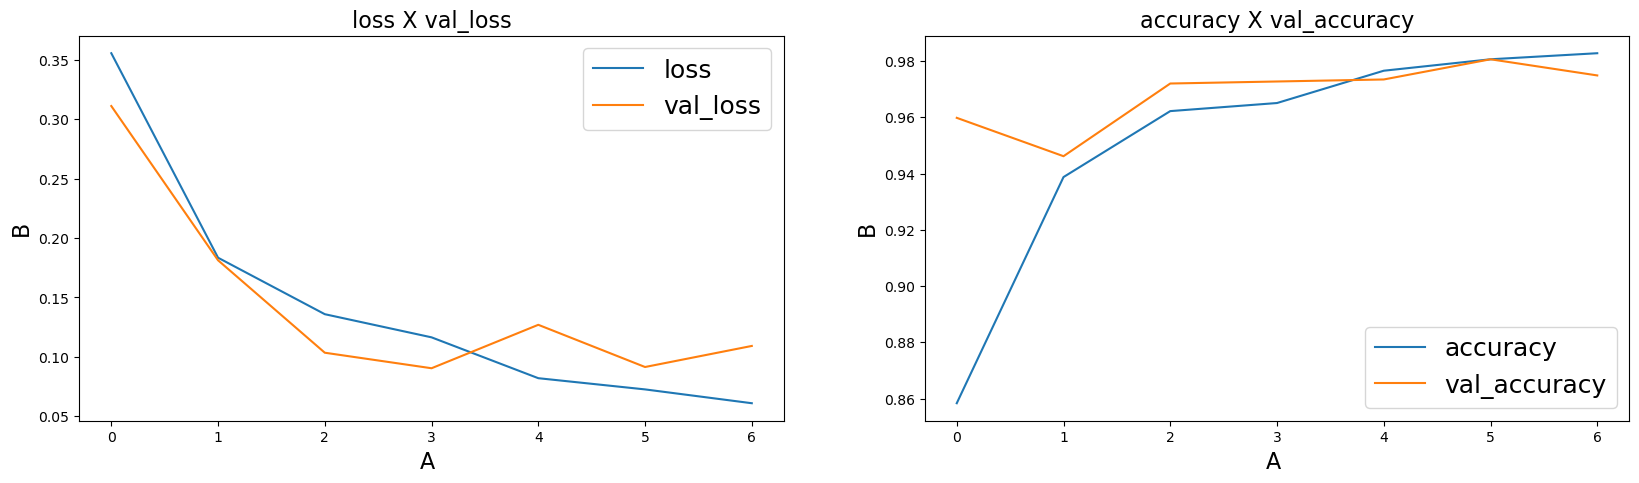

In [73]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [74]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix=confusion_matrix(y_test, y_preds)

44/44 [==============================] - 1s 25ms/step


In [75]:
y_preds

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [77]:
print('Precision: %.3f' % precision_score(y_test, y_preds))

Precision: 0.896


In [66]:
conf_matrix

array([[1192,    7],
       [  25,  169]], dtype=int64)